# 1. Install and Import dependencies

### Drive setting

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls

drive  sample_data


In [3]:
%cd /content/drive/MyDrive/Super ai ss3/PersonDetection

/content/drive/MyDrive/Super ai ss3/PersonDetection


## Install YOLOv5

In [4]:
## Clone repository
!git clone https://github.com/ultralytics/yolov5  

Cloning into 'yolov5'...
remote: Enumerating objects: 14302, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 14302 (delta 26), reused 28 (delta 9), pack-reused 14242
Receiving objects: 100% (14302/14302), 13.65 MiB | 8.87 MiB/s, done.
Resolving deltas: 100% (9833/9833), done.


In [5]:
! ls

datasets  Train.ipynb  yolov5


In [6]:
## Change directory to yolov5
%cd yolov5

/content/drive/MyDrive/Super ai ss3/PersonDetection/yolov5


In [7]:
## install required library
!pip install -r requirements.txt  # install

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 182 kB 27.6 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
     |████████████████████████████████| 1.6 MB 64.4 MB/s 


# 2. Yolo Model

In [8]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [9]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

/usr/local/lib/python3.8/dist-packages/torch/hub.py:266: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-12-5 Python-3.8.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)



  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


# 3. Make Detections with Images

In [10]:
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'

In [11]:
from skimage import io

image = io.imread(img)

In [12]:
results = model(image)
results.print()

image 1/1: 533x800 28 cars, 5 trucks
Speed: 20.3ms pre-process, 37.0ms inference, 35.9ms NMS per image at shape (1, 3, 448, 640)


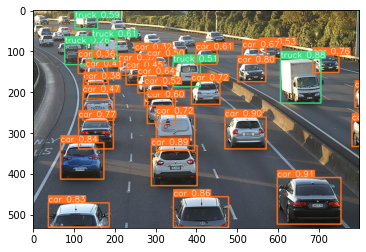

In [13]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

# 4. Train

In [14]:
!ls

benchmarks.py	 data	     LICENSE	       segment	       utils
CITATION.cff	 detect.py   models	       setup.cfg       val.py
classify	 export.py   README.md	       train.py        yolov5s.pt
CONTRIBUTING.md  hubconf.py  requirements.txt  tutorial.ipynb


In [16]:
# Train YOLOv5s 
!python train.py --img 640 --batch 5 --epochs 5 --data dataset.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=5, batch_size=5, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
fatal: cannot change to '/content/drive/MyDrive/Super': No such file or directory
YOLOv5 🚀 2022-12-5 Python-3.8.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, i

# Load custom model

In [18]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path = '/content/drive/MyDrive/Super ai ss3/PersonDetection/yolov5/runs/train/exp/weights/best.pt')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-12-5 Python-3.8.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
